In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2,chisquare
import folium
from folium import plugins
import scipy.stats as st

This dataset contains detailed information about privately sold housing options and property
for rent of U.S. Craiglist website. It is an essential tool for stakeholders and real estates aiming to identify opportunities for improving the experience, quality and performance across the country. Providers benefit by having access to comprehensive data regarding price,type of the house, sqfeet ,beds and baths, wheelchair_access , electric_vehicle_charge with parking_options as well as other pertinent metrics like geographic tools which hels you to get latitude_longitude of a place with image urls.

The main purpose of this project is to collect information from multiple sources and extract useful information and then analyze the prices of the property as Humans are not able to analyze such big data, unlike algorithms.


In [2]:
df=pd.read_csv('housing.csv',low_memory=False)
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


## DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [4]:
df.shape

(384977, 22)

In [5]:
df.loc[df.duplicated()]

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state


In [3]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [4]:
#finding the percentage of missing values:

round(df.isnull().sum()/df.shape[0]*100,3)

id                          0.000
url                         0.000
region                      0.000
region_url                  0.000
price                       0.000
type                        0.000
sqfeet                      0.000
beds                        0.000
baths                       0.000
cats_allowed                0.000
dogs_allowed                0.000
smoking_allowed             0.000
wheelchair_access           0.000
electric_vehicle_charge     0.000
comes_furnished             0.000
laundry_options            20.527
parking_options            36.544
image_url                   0.000
description                 0.001
lat                         0.498
long                        0.498
state                       0.000
dtype: float64

In [5]:
#missing value column names + count of missing values + missing values percentage
missvalcount=df.isnull().sum()
missvalpercent=df.isnull().sum()/df.shape[0]*100
checkMissVal=pd.concat([missvalcount,missvalpercent],axis=1)
missval1=checkMissVal.rename(columns={0:'missvalcount',1:'missval %'})
missval1[missval1['missvalcount']!=0].sort_values(by='missvalcount',ascending=False)

,missvalcount,missval %
parking_options,140687,36.544261
laundry_options,79026,20.527460
lat,1918,0.498212
long,1918,0.498212
description,2,0.000520


In [9]:
import missingno as ms

<Axes: >

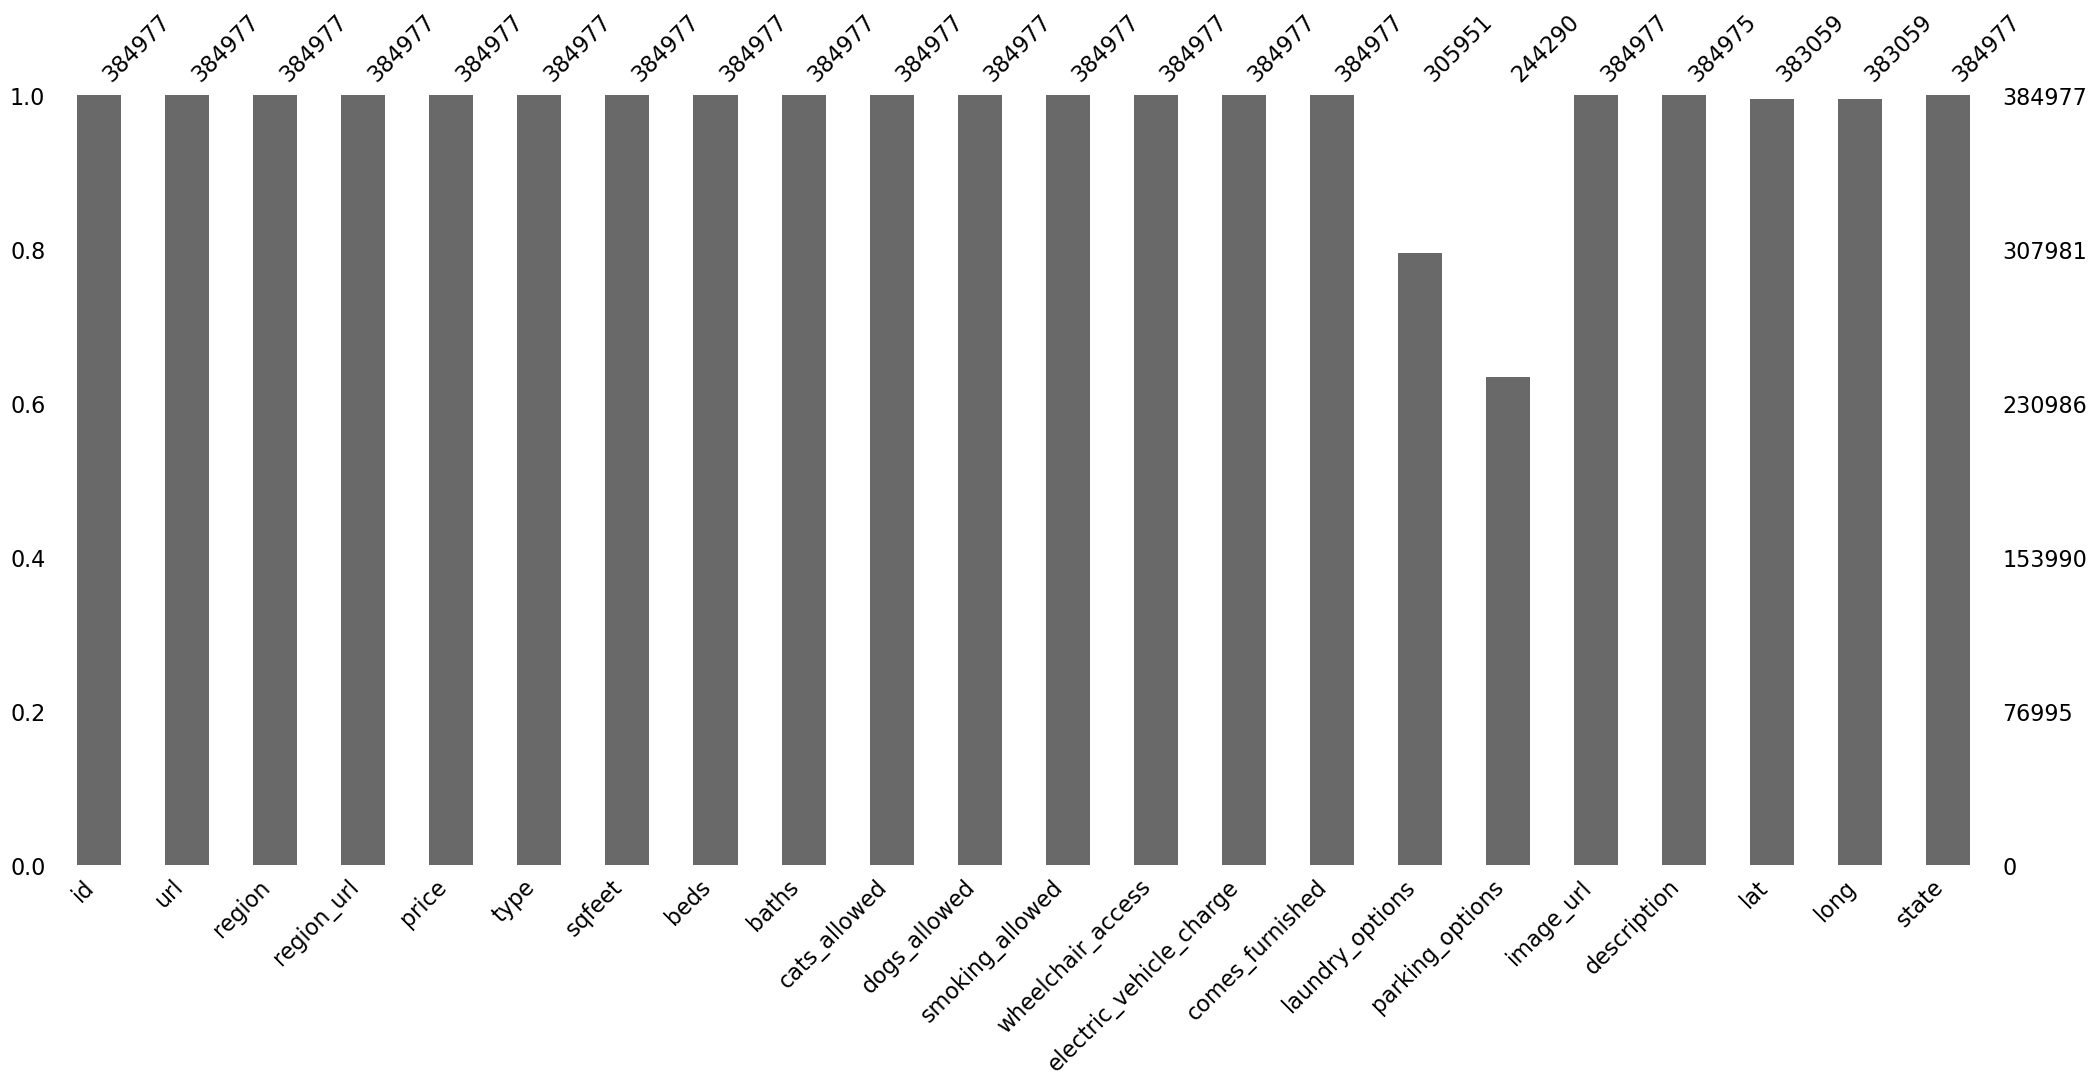

In [10]:
ms.bar(df)

This bar chart gives us an idea about how many missing values are there in each column. In
our dataset,parking_options-36.54% , laundry_options-20.52% ,lat-0.49% ,long-0.49% contain
the most number of missing values followed by description.



<Axes: >

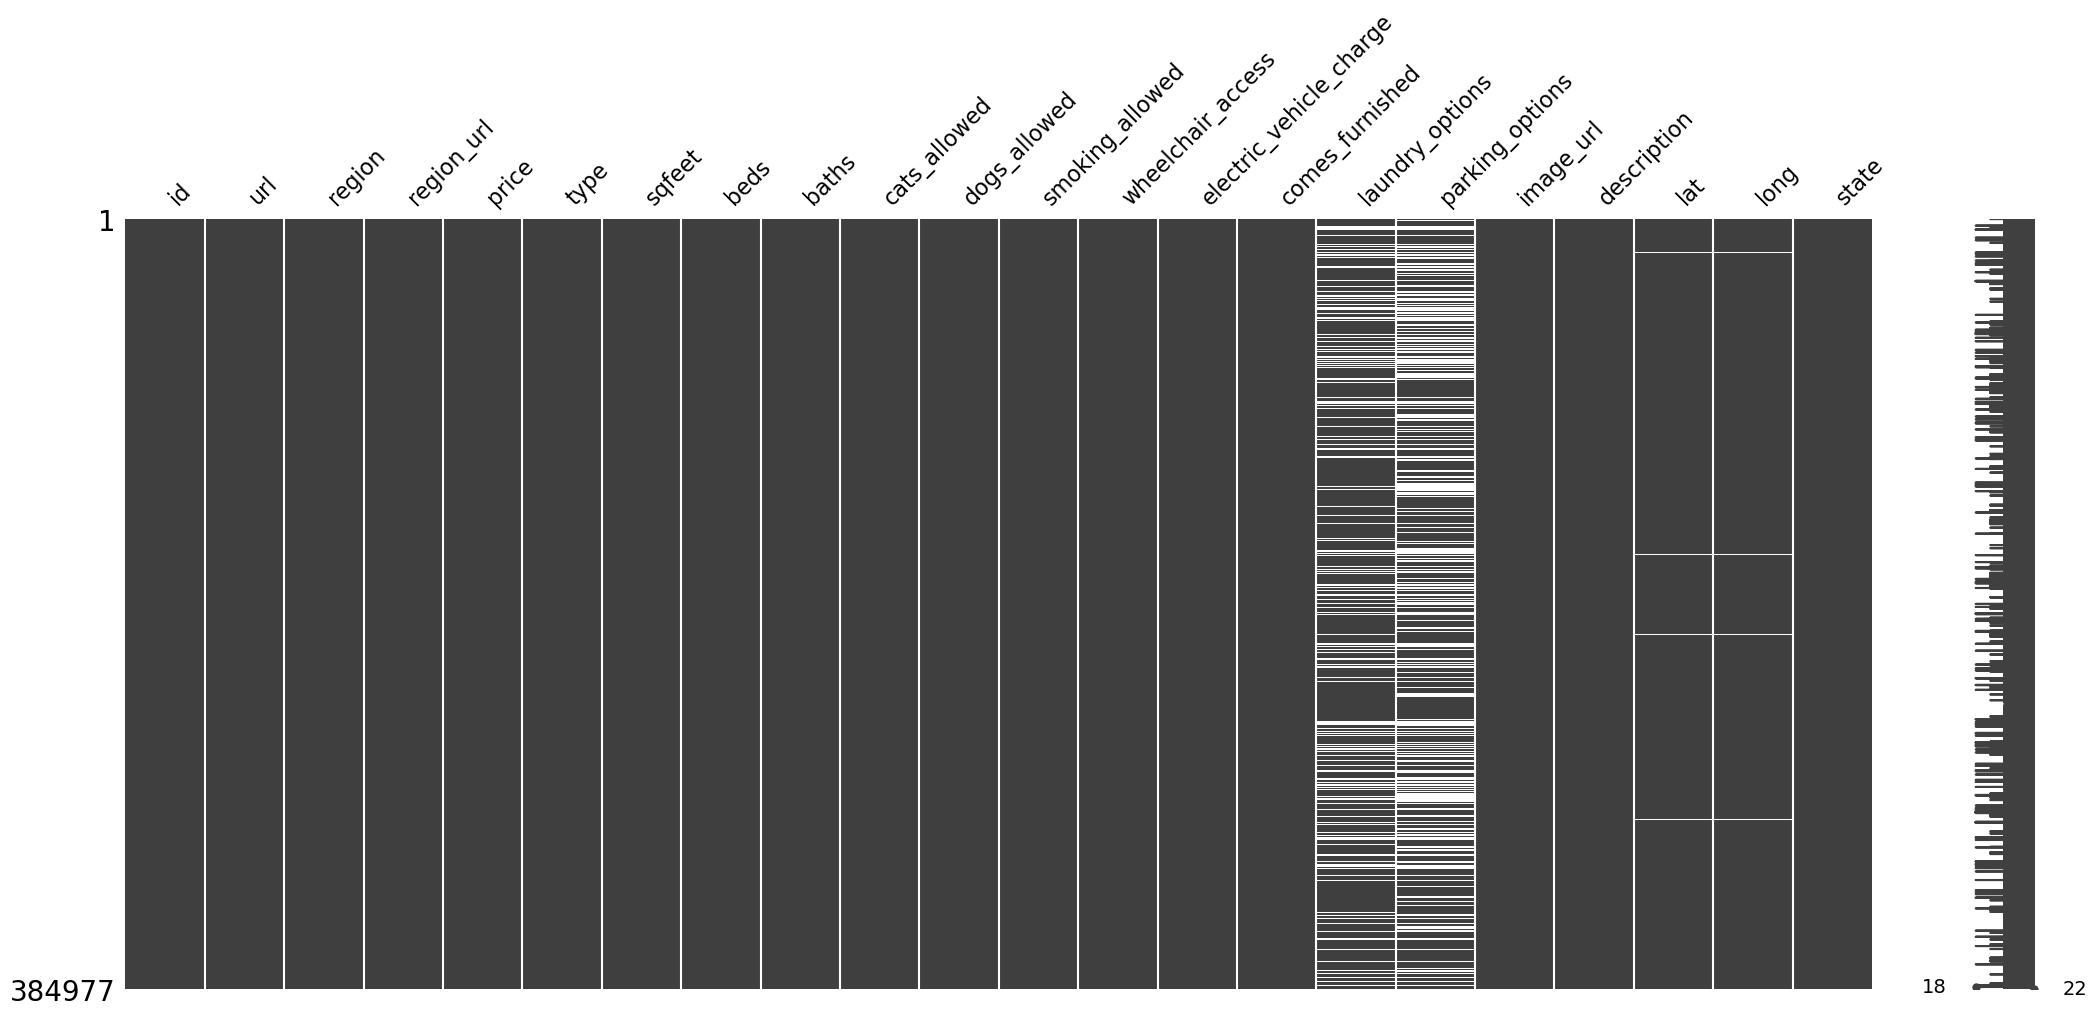

In [11]:
ms.matrix(df)

We can find with the pattern of missingness in the dataset,where missing values are present .

In [6]:
df1=df.copy()

In [242]:
#checking unique values of 'parking_options'

df1['parking_options'].unique()

array(['carport', 'attached garage', nan, 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [7]:
#Since there are more than 36% null values in parking_options , so we can't replace it with mode

df1['parking_options'] = df1['parking_options'].fillna('Not Available')

In [8]:
df1['parking_options'].isnull().sum()

0

In [9]:
df1['laundry_options'].unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site', 'laundry in bldg',
       nan, 'no laundry on site'], dtype=object)

In [9]:
#Since there are more than 20% null values in laundry_options , so we can't replace it with mode

df1['laundry_options'] = df1['laundry_options'].fillna('Not Available')

In [10]:
df1['laundry_options'].isnull().sum()

0

In [11]:
#replacing null values for lat with mean:
df1['lat']=df1['lat'].fillna(df1['lat'].mean())

In [12]:
df1['lat'].isnull().sum()

0

In [13]:
df1['long']=df1['long'].fillna(df1['long'].mean())

In [14]:
df1['long'].isnull().sum()

0

<Axes: >

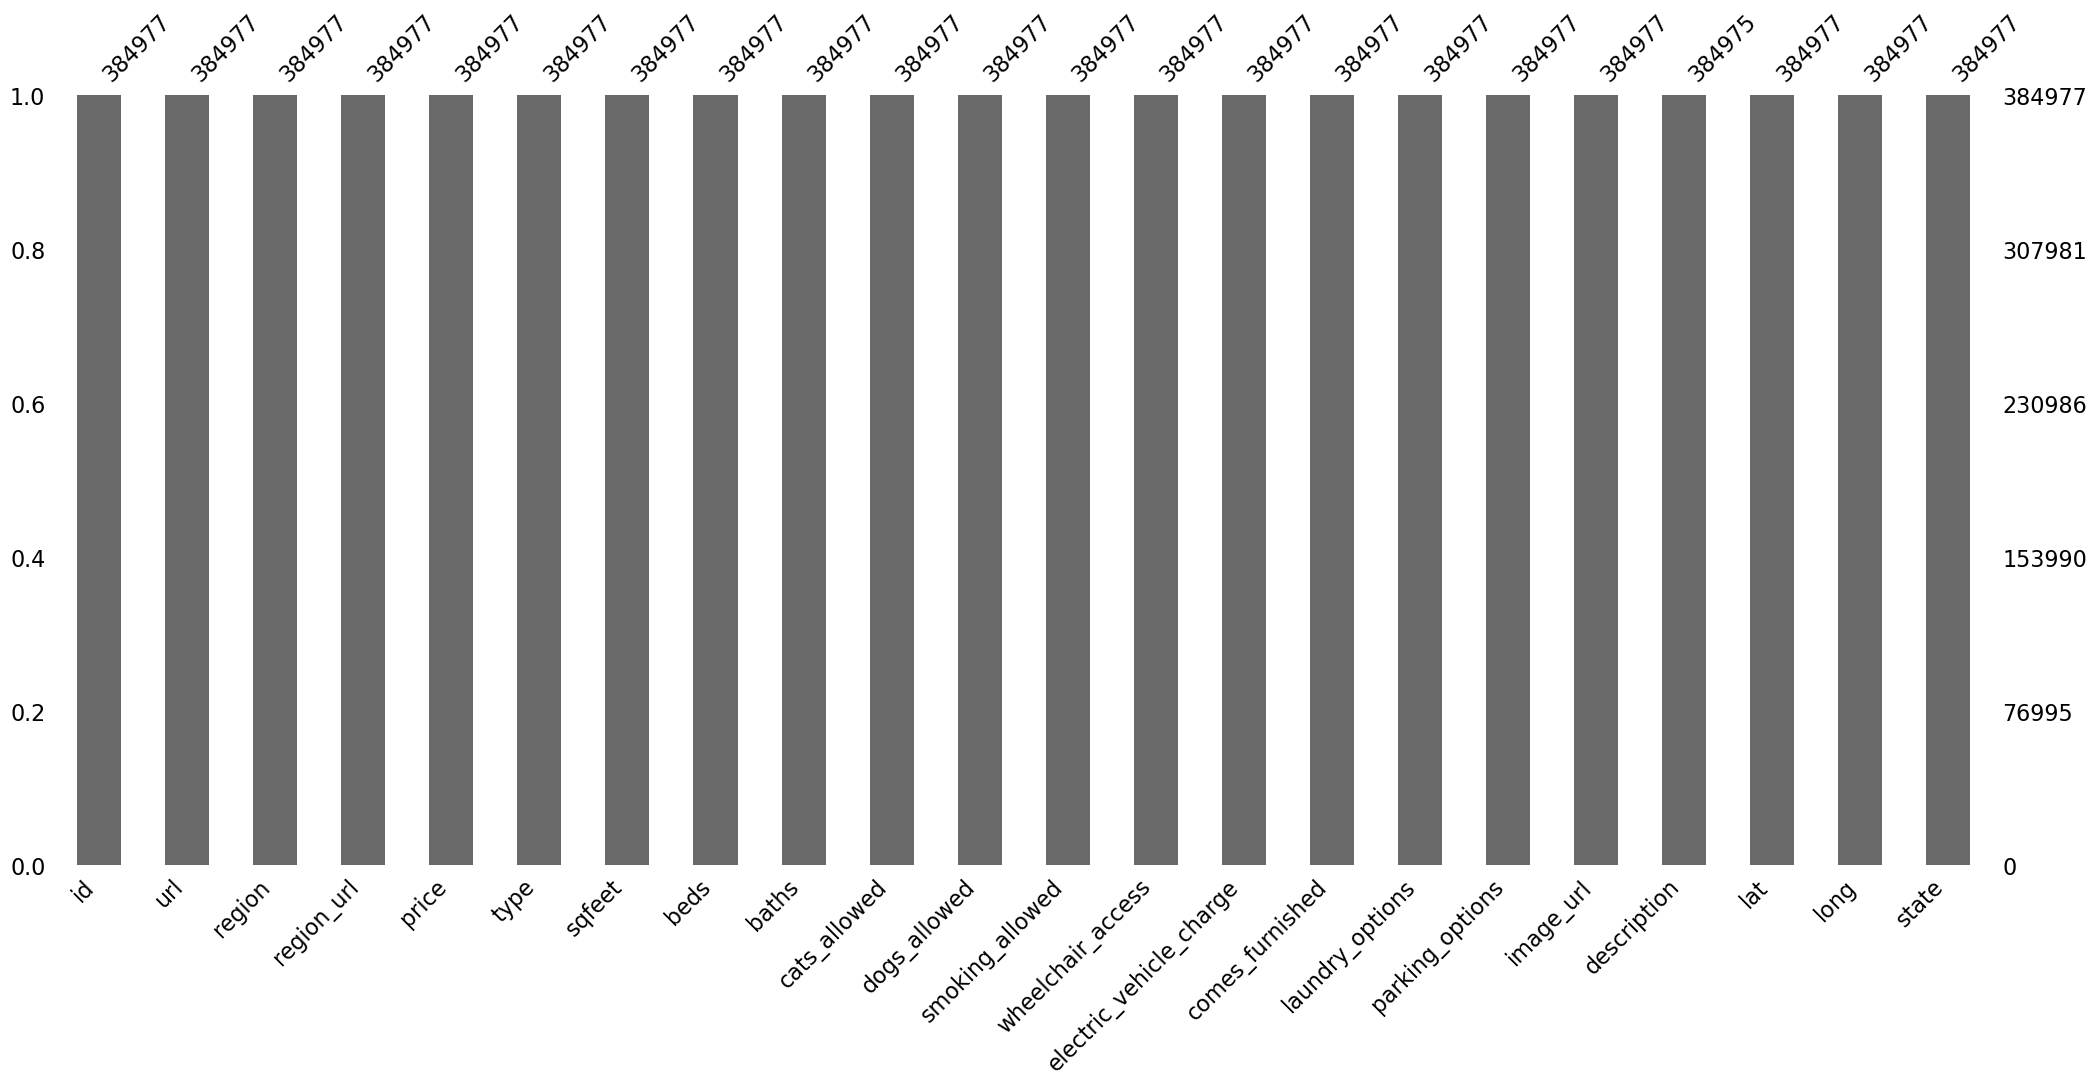

In [22]:
ms.bar(df1)

Here i have represented these missing values as (Not Available) values.That’s why i have
used imputation techniques to replace the NaN values with some probable values.We can also
visualize that there are no missing values present in the dataset now.

In [15]:
df1.drop(['description','id','url','region_url','image_url',],axis=1,inplace=True)

In [17]:
df1.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789,ca
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708,ca
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771,ca
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,Not Available,39.5357,-119.805,ca


Here dropping 'description' column because it is not significant for our model.

## STATISTICAL ANALYSIS

In [25]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,384977.0,8825.722318,4.462200e+06,0.0000,805.0000,1036.0000,1395.0000,2.768307e+09
sqfeet,384977.0,1059.899565,1.915076e+04,0.0000,750.0000,949.0000,1150.0000,8.388607e+06
beds,384977.0,1.905345,3.494572e+00,0.0000,1.0000,2.0000,2.0000,1.100000e+03
baths,384977.0,1.480718,6.180605e-01,0.0000,1.0000,1.0000,2.0000,7.500000e+01
cats_allowed,384977.0,0.726890,4.455574e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
dogs_allowed,384977.0,0.707918,4.547206e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
smoking_allowed,384977.0,0.731771,4.430381e-01,0.0000,0.0000,1.0000,1.0000,1.000000e+00
wheelchair_access,384977.0,0.082111,2.745347e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00
electric_vehicle_charge,384977.0,0.012871,1.127177e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00
comes_furnished,384977.0,0.048128,2.140360e-01,0.0000,0.0000,0.0000,0.0000,1.000000e+00


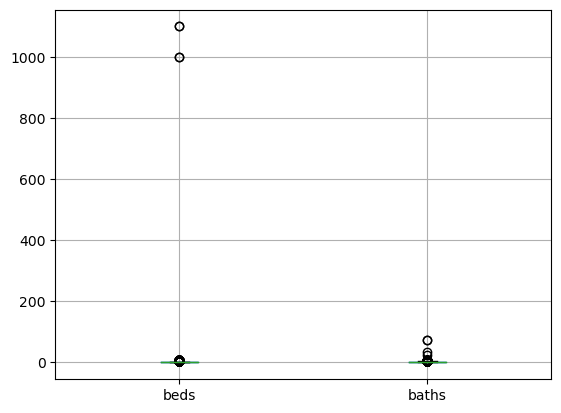

In [25]:
out=df1.boxplot(column=['beds','baths'])
out.plot()
plt.show()                

We can observe here that beds and bath both have outliers with the help of boxplot

In [16]:
df2=df1.copy()

In [ ]:
#finding outliers for 'beds' using IQR Method:

In [17]:
IQR1=df2['beds'].quantile(0.75)-df2['beds'].quantile(0.25)
upper1=df2['beds'].quantile(0.75)+(1.5*IQR1)
lower1=df2['beds'].quantile(0.25)-(1.5*IQR1)
df2[(df2['beds']>upper1) | (df2['beds']<lower1)].shape[0]                 

14223

In [ ]:
#finding outliers for 'baths' using IQR Method:

In [18]:
IQR1=df2['baths'].quantile(0.75)-df2['baths'].quantile(0.25)
upper1=df2['baths'].quantile(0.75)+(1.5*IQR1)
lower1=df2['baths'].quantile(0.25)-(1.5*IQR1)
df2[(df2['baths']>upper1) | (df2['baths']<lower1)].shape[0]                                                

1956

Capping of outliers:

In [19]:
max1=df2['beds'].quantile(0.75)+(1.5*IQR1)
min1=df2['beds'].quantile(0.25)-(1.5*IQR1)

In [20]:
df2['beds']=np.clip(df2['beds'],min1,max1)

In [21]:
df2[(df2['beds']>upper1)|(df2['beds']<lower1)].shape[0]

0

Another way to cap outliers is taking maximum and minimum percentiles:

In [22]:
max2=df2['baths'].quantile(0.95)
min2=df2['baths'].quantile(0.01)

In [23]:
df2['baths']=np.clip(df2['baths'],min1,max1)

In [24]:
df2[(df2['baths']>upper1)|(df2['baths']<lower1)].shape[0]

0

We can see here with the help of above calculations 'baths' and 'beds' outliers has been removed.

(array([3.84976e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 2.76830725e+08, 5.53661450e+08, 8.30492175e+08,
        1.10732290e+09, 1.38415362e+09, 1.66098435e+09, 1.93781507e+09,
        2.21464580e+09, 2.49147652e+09, 2.76830725e+09]),
 <BarContainer object of 10 artists>)

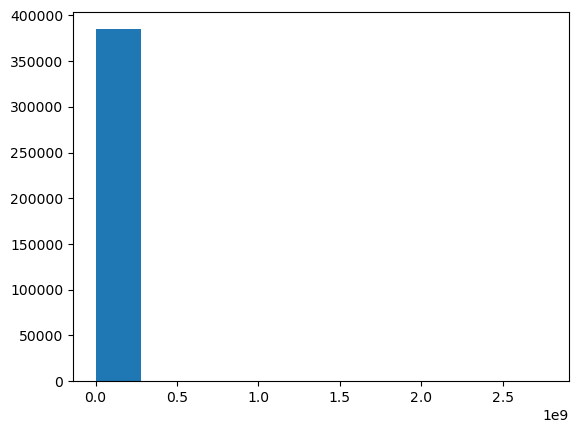

In [35]:
plt.hist(x='price',data=df2)

Histplot shows us that 'price' column has alot of outliers and we need to remove them as our 
model can be biased towards price.

In [25]:
IQR2=df2['price'].quantile(0.75)-df2['price'].quantile(0.25)
upper2=df2['price'].quantile(0.75)+(1.5*IQR2)
lower2=df2['price'].quantile(0.25)-(1.5*IQR2)
df2[(df2['price']>upper2) | (df2['price']<lower2)].shape[0]
                                                

18722

capping of outliers:

In [26]:
max3=df2['price'].quantile(0.95)
min3=df2['price'].quantile(0.01)

In [27]:
df2['price']=np.clip(df2['price'],max3,min3)

In [28]:
df2[(df2['price']>upper2)|(df2['price']<lower2)].shape[0]

0

<Axes: xlabel='price', ylabel='Count'>

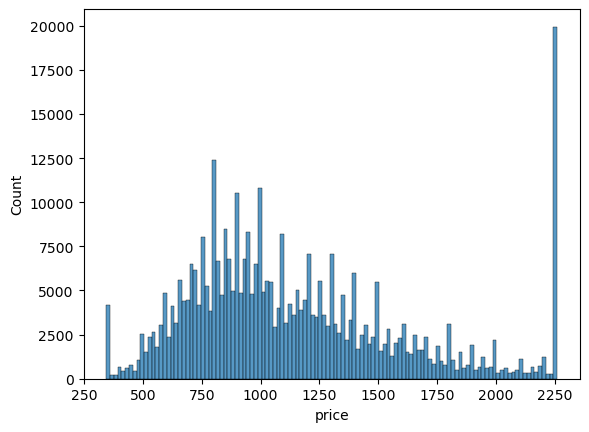

In [40]:
sns.histplot(df2.price)

Here we can check that the 'price' column looks normal distribution but it is 
slightly right skewed which hints towards the mean dominating the  price of houses.

(array([3.84969e+05, 6.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([      0. ,  838860.7, 1677721.4, 2516582.1, 3355442.8, 4194303.5,
        5033164.2, 5872024.9, 6710885.6, 7549746.3, 8388607. ]),
 <BarContainer object of 10 artists>)

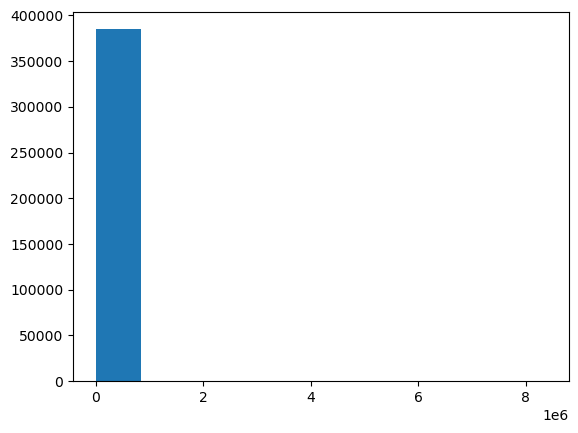

In [29]:
plt.hist(x='sqfeet',data=df2)

This chart shows that the square footage of some rentals home are 0. According to zonning,
The minimum square footage for a house is at least 120squarefeet which gives us the idea that 'sqfeet' has outliers so we need to remove those outliers from the data.

In [ ]:
#finding outliers for 'sqfeet' using IQR method:

In [30]:
IQR3=df2['sqfeet'].quantile(0.75)-df2['sqfeet'].quantile(0.25)
upper3=df2['sqfeet'].quantile(0.75)+(1.5*IQR3)
lower3=df2['sqfeet'].quantile(0.25)-(1.5*IQR3)
df2[(df2['sqfeet']>upper3) | (df2['price']<lower3)].shape[0]                              

15041

Here we are capping the outliers using maximum minimum percentiles:

In [31]:
max4=df2['sqfeet'].quantile(0.95)
min4=df2['sqfeet'].quantile(0.01)

In [32]:
df2['sqfeet']=np.clip(df2['sqfeet'],max4,min4)

In [33]:
df2[(df2['sqfeet']>upper3)|(df2['sqfeet']<lower3)].shape[0]

0

(array([11566., 23557., 51742., 64749., 66555., 62984., 40483., 21428.,
        15656., 26257.]),
 array([ 340. ,  470.2,  600.4,  730.6,  860.8,  991. , 1121.2, 1251.4,
        1381.6, 1511.8, 1642. ]),
 <BarContainer object of 10 artists>)

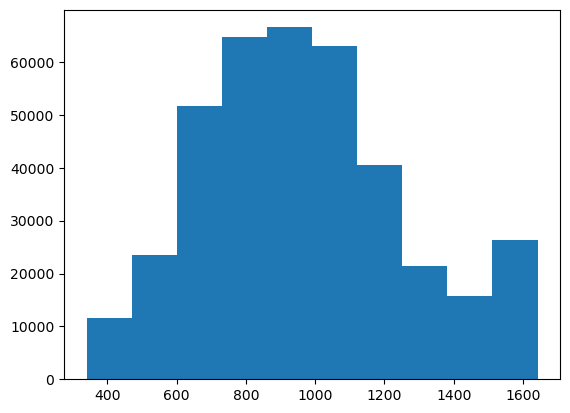

In [46]:
plt.hist(df2.sqfeet)

We can check here that the chart 'sqfeet' looks normal which proves that the outliers have been removed.It is slightly shifting towards right side which indicates bigger houses with large sqfeet are also available.

/var/folders/7k/bwswrj093wv4v5kvfxfcrz200000gn/T/ipykernel_1097/3750077057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.price)


<Axes: xlabel='price', ylabel='Density'>

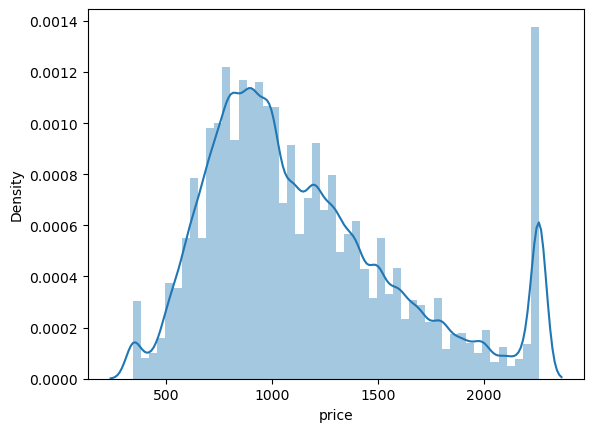

In [47]:
sns.distplot(df2.price)

The price distribution is right skewed,the mean of the house price is more than the median.
There are alot of houses on higher prices.

### CHI-SQUARE TEST

The Chi-Square test is a statistical procedure for determining the difference between observed and expected data. 
It helps to find out whether a difference between two categorical variables is due to chance or a relationship 
between them.

In [202]:
df2.head(1)

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,reno / tahoe,1148,apartment,1078,3.0,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796,ca


In [203]:
table=pd.crosstab(df2['type'],df2['smoking_allowed'])
table

smoking_allowed,0,1
type,,
apartment,78714,239318
assisted living,0,2
condo,3319,2919
cottage/cabin,455,406
duplex,3004,2043
flat,213,318
house,11200,22066
in-law,130,42
land,3,5


H0: smoking_allowed is affecting the type of house

H1: smoking_allowed is not affecting the type of house


In [204]:
alpha=0.05

In [205]:
#To return the attribute in numpy representation of the given dataframe.
observed_val = table.values
print('Observed values :- \n' ,observed_val)

Observed values :- 
 [[ 78714 239318]
 [     0      2]
 [  3319   2919]
 [   455    406]
 [  3004   2043]
 [   213    318]
 [ 11200  22066]
 [   130     42]
 [     3      5]
 [   372    321]
 [   822   3420]
 [  5030  10855]]


In [206]:
val=st.chi2_contingency(table)

In [207]:
val

Chi2ContingencyResult(statistic=7569.91170452374, pvalue=0.0, dof=11, expected_freq=array([[8.53054089e+04, 2.32726591e+05],
       [5.36458022e-01, 1.46354198e+00],
       [1.67321257e+03, 4.56478743e+03],
       [2.30945179e+02, 6.30054821e+02],
       [1.35375182e+03, 3.69324818e+03],
       [1.42429605e+02, 3.88570395e+02],
       [8.92290628e+03, 2.43430937e+04],
       [4.61353899e+01, 1.25864610e+02],
       [2.14583209e+00, 5.85416791e+00],
       [1.85882705e+02, 5.07117295e+02],
       [1.13782747e+03, 3.10417253e+03],
       [4.26081784e+03, 1.16241822e+04]]))

In [208]:
expected_val = val[3]
expected_val

array([[8.53054089e+04, 2.32726591e+05],
       [5.36458022e-01, 1.46354198e+00],
       [1.67321257e+03, 4.56478743e+03],
       [2.30945179e+02, 6.30054821e+02],
       [1.35375182e+03, 3.69324818e+03],
       [1.42429605e+02, 3.88570395e+02],
       [8.92290628e+03, 2.43430937e+04],
       [4.61353899e+01, 1.25864610e+02],
       [2.14583209e+00, 5.85416791e+00],
       [1.85882705e+02, 5.07117295e+02],
       [1.13782747e+03, 3.10417253e+03],
       [4.26081784e+03, 1.16241822e+04]])

In [209]:
#checking p_value manually:
p_val=st.chi2.sf(7569.91170452374,11)
p_val

0.0

In [210]:
#checking critical_value:
crit_val=st.chi2.isf(0.05,11)
crit_val

19.67513757268249

In [211]:
#to find chi2 square:

chi_square = sum([(o-e)**2./e for o,e in zip(observed_val,expected_val)])
chi_square

array([5539.44177403, 2030.4699305 ])

In [212]:
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

7569.911704523741

In [213]:
chi_square_statistic=val[0]
chi_square_statistic

7569.91170452374

In [214]:
if crit_val > chi_square_statistic:
    print('fail to reject H0')

else:
    print('Reject null hypothesis')
    

Reject null hypothesis


In [215]:
if p_val > alpha:
    print('fail to reject null hypothesis')

else:
    print('Reject null hypothesis')
    

Reject null hypothesis


With the above testing we can conclude that smoking_allowed has no effect on the type of the
house.These two columns are independent of each other.

## EXPLORATORY DATA ANALYSIS

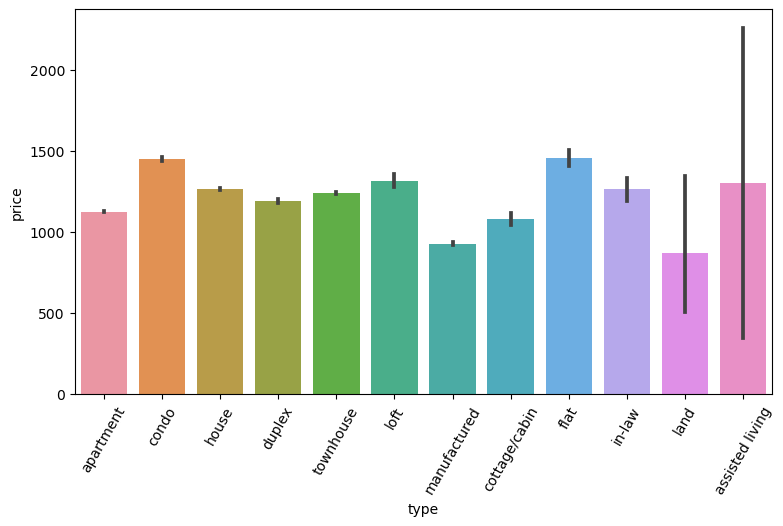

In [48]:
#we have plot barchart so that we can see the price vs type of the house:

plt.figure(figsize=(9,5))
plt.xticks(rotation=60)
sns.barplot(x='type',
            y='price',
            data=df2)
plt.show()

In [231]:
#count of values in the type of house:
df2['type'].value_counts()

apartment          318032
house               33266
townhouse           15885
condo                6238
duplex               5047
manufactured         4242
cottage/cabin         861
loft                  693
flat                  531
in-law                172
land                    8
assisted living         2
Name: type, dtype: int64

with the help of barchart we can infer that assisted_living type of house has the highest price,
followed by flat and condo.

/var/folders/7k/bwswrj093wv4v5kvfxfcrz200000gn/T/ipykernel_1097/3996889876.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1,10,5)


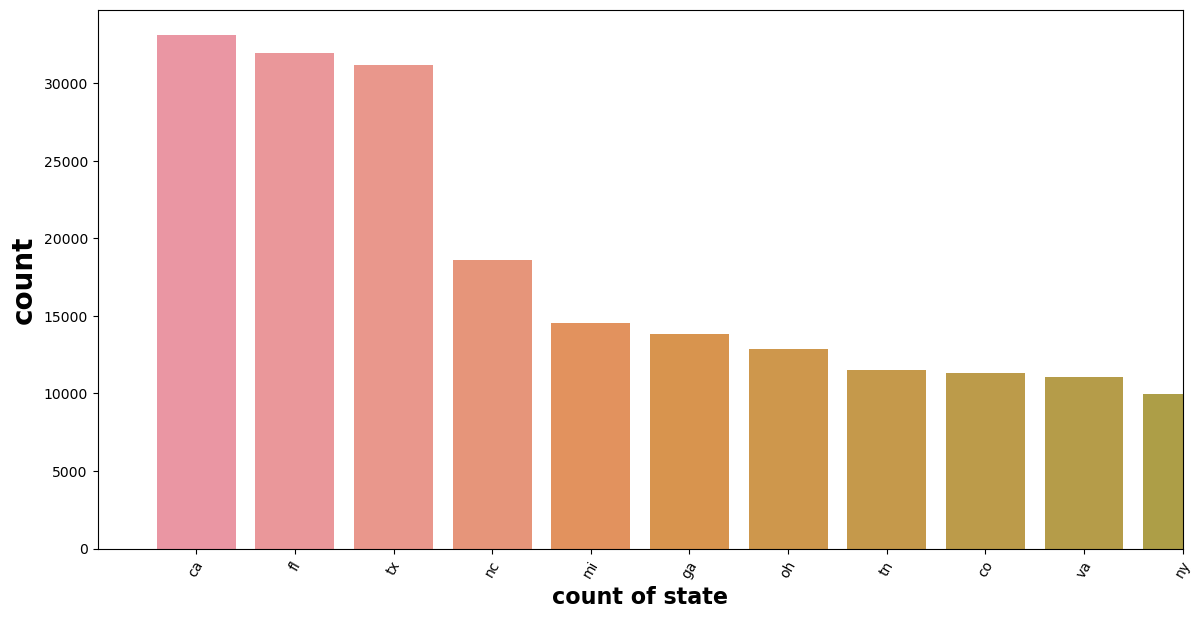

In [49]:
#with countplot we are trying to show which state has maximum number of property:

plt.subplots(figsize=(14,7))
sns.countplot(x='state',data=df2,order=df2['state'].value_counts().index)
#plt.title('location',weight='bold',fontsize=20,pad=20)
plt.ylabel('count',weight='bold',fontsize=20)
plt.xlabel('count of state',weight='bold',fontsize=16)
plt.xticks(rotation=60)
plt.xlim(-1,10,5)
plt.show()

The state with maximum number of properties are located in california,florida and texas, 
whereas houses with lowest properties are in virginia and in new york.

/var/folders/7k/bwswrj093wv4v5kvfxfcrz200000gn/T/ipykernel_1097/2132085674.py:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1,10,5)


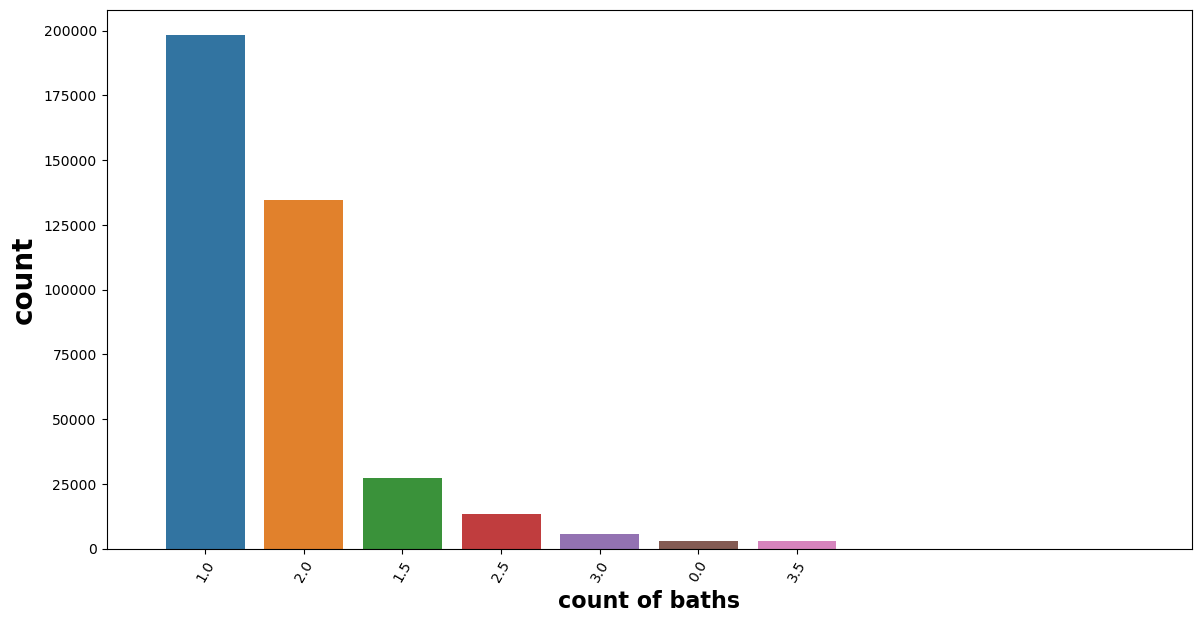

In [50]:
#count of baths:
plt.subplots(figsize=(14,7))
sns.countplot(x='baths',data=df2,order=df2['baths'].value_counts().index)
plt.ylabel('count',weight='bold',fontsize=20)
plt.xlabel('count of baths',weight='bold',fontsize=16)
plt.xticks(rotation=60)
plt.xlim(-1,10,5)
plt.show()

With the help of countplot we can infer that maximum houses has 1bath and 2bath.some houses
has 1.5bath and 2.5bath which means 1full bath and other half which might not have fully 
bath/shower enclosure option,those are categorised as half.

/var/folders/7k/bwswrj093wv4v5kvfxfcrz200000gn/T/ipykernel_1097/106630287.py:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(-1,10,5)


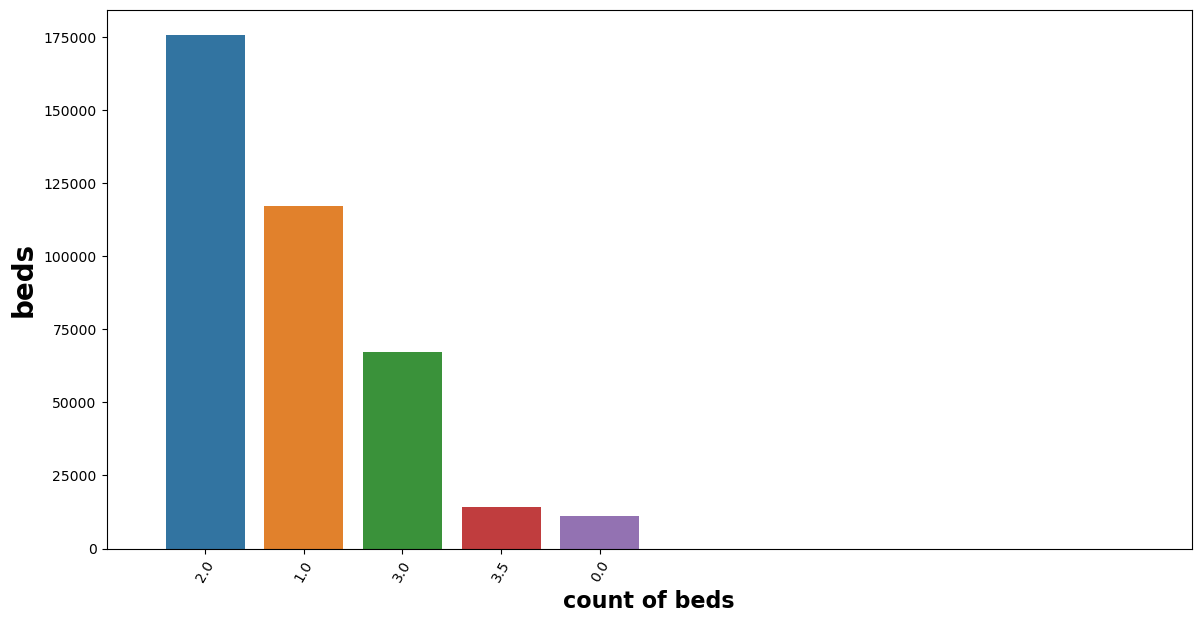

In [51]:
#count of beds:
plt.subplots(figsize=(14,7))
sns.countplot(x='beds',data=df2,order=df2['beds'].value_counts().index)
plt.ylabel('beds',weight='bold',fontsize=20)
plt.xlabel('count of beds',weight='bold',fontsize=16)
plt.xticks(rotation=60)
plt.xlim(-1,10,5)
plt.show()

In this plot we can infer that the maximum no of houses give atleast 2beds option and minimum 1bed in the house.some houses also has 3 to 3.5 beds option.

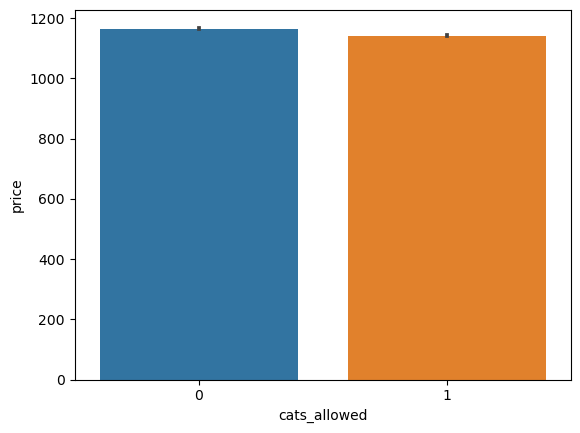

In [52]:
sns.barplot(data=df2,
            x='cats_allowed',
            y='price')
plt.show()

With the help of barplot we can see that cats_allowed does not have any significant effect over the price of the
house.The percentage of cats_allowed and not allowed is almost equal.

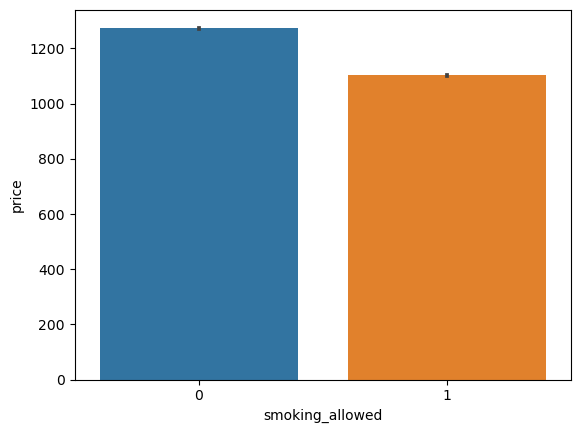

In [53]:
sns.barplot(data=df2,
            x='smoking_allowed',
            y='price')
plt.show()

Houses where Smoking is not_allowed has slightly higher prices as compared to houses which has smoking_allowed 
option. 

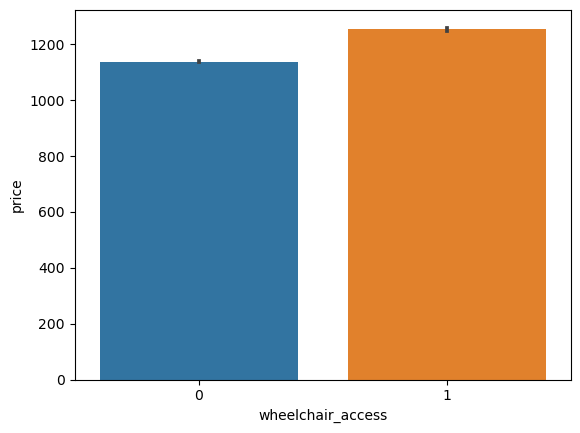

In [54]:
sns.barplot(data=df2,
            x='wheelchair_access',
            y='price')
plt.show()

In this plot we can assume with the help of barplot that,houses which has wheelchair_access is slightly towards the 
higher price range compared to the houses which does not have wheelchair_access.

In [56]:
#we are checking the value counts of electric_vehicle_charge column:

charging=df2['electric_vehicle_charge'].value_counts()
charging

0    380022
1      4955
Name: electric_vehicle_charge, dtype: int64

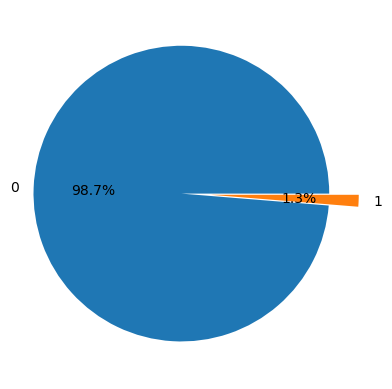

In [57]:
#we can check here that 98.7% house does not have 'electric_vehicle_charge' options:

plt.pie(df2['electric_vehicle_charge'].value_counts(),labels=charging.index,autopct='%.1f%%',explode=[0.1,0.1])
plt.show()

We can check here with the help of pie-chart that 98.7% house does not have 'electric_vehicle_charge' option,only 
1.3% houses gives electric_vehicle_charge facility.


In [363]:
#checking the 'sqfeet' count of values:
df2['sqfeet'].value_counts()


1642    19269
1000    10119
900      8522
1100     6989
800      6913
        ...  
346         1
389         1
376         1
359         1
369         1
Name: sqfeet, Length: 1302, dtype: int64

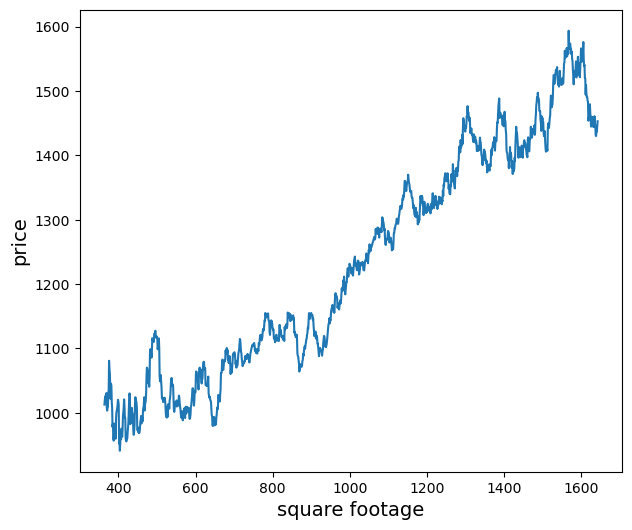

In [58]:
fig, ax = plt.subplots(figsize = (7,6))
group= df2.groupby("sqfeet")["price"].mean()
rollingGroup = group.rolling(25).mean()
sqfeetData = rollingGroup.index.values
priceData = rollingGroup.values
ax.set_xlabel("square footage", fontsize = 14)
ax.set_ylabel("price", fontsize = 14)
ax.plot(sqfeetData, priceData)

The line chart shows relationship between squarefeet and price.we can clearly see the upward trend 
between the two variables- as the squarefeet increses price is also incresing.

In [293]:
heatMap = folium.Map([41, -96], zoom_start = 4)
heatMapCleanLoc = df2[np.isfinite(df2['lat'])].sample(n=50000)
heatArr = heatMapCleanLoc[["lat", "long"]].to_numpy()
heatMap.add_child(plugins.HeatMap(heatArr, radius = 15))


With the heatmap we can exactly view the listed-properties of USA and the name of states where it is lying. 

In [294]:
df2.corr()

/var/folders/7k/bwswrj093wv4v5kvfxfcrz200000gn/T/ipykernel_1153/1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
price,1.000000,0.358263,0.199721,0.283431,-0.023672,-0.017930,-0.163759,0.069380,0.116363,-0.001276,0.043381,-0.189469
sqfeet,0.358263,1.000000,0.787730,0.677781,-0.071839,-0.030720,-0.029822,-0.020990,0.005793,-0.009914,0.014931,0.073309
beds,0.199721,0.787730,1.000000,0.639082,-0.072497,-0.036287,-0.002701,-0.043411,-0.017992,-0.001632,0.031712,0.027544
baths,0.283431,0.677781,0.639082,1.000000,-0.017445,0.022086,-0.015767,0.019054,0.008932,0.033204,-0.082262,-0.006067
cats_allowed,-0.023672,-0.071839,-0.072497,-0.017445,1.000000,0.887297,0.017029,0.122366,0.049356,-0.058884,-0.015671,0.033690
dogs_allowed,-0.017930,-0.030720,-0.036287,0.022086,0.887297,1.000000,0.013796,0.129112,0.049274,-0.037666,-0.056431,0.018625
smoking_allowed,-0.163759,-0.029822,-0.002701,-0.015767,0.017029,0.013796,1.000000,-0.223623,-0.096017,-0.161351,-0.176674,0.162496
wheelchair_access,0.069380,-0.020990,-0.043411,0.019054,0.122366,0.129112,-0.223623,1.000000,0.193245,0.195817,0.002741,-0.025150
electric_vehicle_charge,0.116363,0.005793,-0.017992,0.008932,0.049356,0.049274,-0.096017,0.193245,1.000000,0.069611,0.025995,-0.060277
comes_furnished,-0.001276,-0.009914,-0.001632,0.033204,-0.058884,-0.037666,-0.161351,0.195817,0.069611,1.000000,0.004629,-0.027153


/var/folders/7k/bwswrj093wv4v5kvfxfcrz200000gn/T/ipykernel_1153/367757490.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<Axes: >

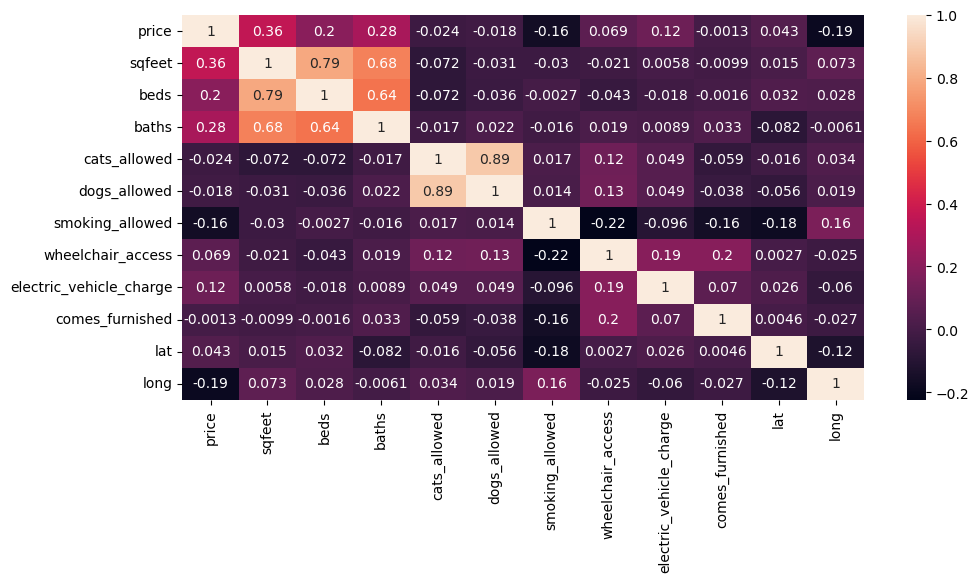

In [295]:
plt.figure(figsize=(11,5))
sns.heatmap(df2.corr(),annot=True)

In the above plot baths and beds having an positive correlation, along with cats_allowed and
dogs_allowed and beds and sqfeet having a very strong positive correlation.

<Figure size 640x480 with 0 Axes>

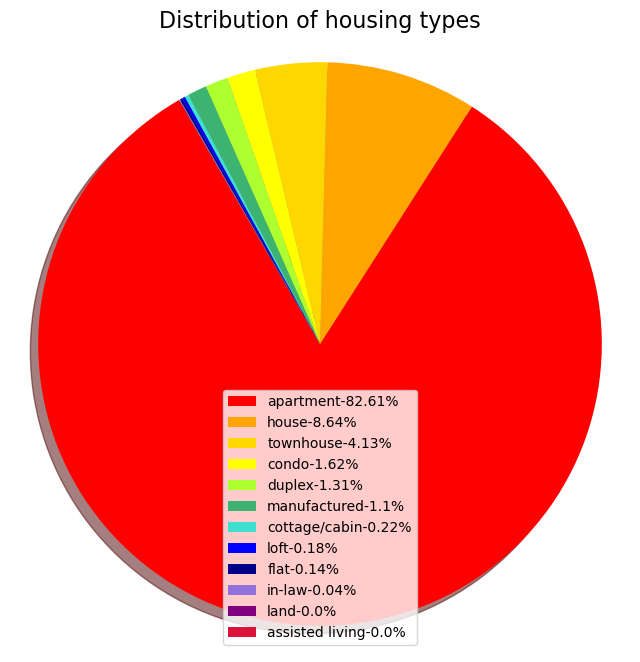

In [296]:
fig = plt.gcf()
plt.figure(figsize=(8,8))
baseColors = ["red", "orange", "gold", "yellow", "greenyellow", "mediumseagreen", 
              "turquoise", "blue", "darkblue", "mediumpurple", "purple", "crimson"]
types = dict(df2.type.value_counts())
labels = []
sizes = []
colors = []
count = 0
for i, v in types.items():
    labels.append(f"{i}-{round(((v / df2.shape[0]) * 100), 2)}%")
    sizes.append(v)
    colors.append(baseColors[count])
    count += 1

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=120)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title("Distribution of housing types", fontsize = 16)
plt.show()

with the help of pie-chart we can infer that apartment is by far the most common housing type followed by house and townhouse.

In [307]:
laundry=df2['laundry_options'].value_counts()
laundry

w/d in unit           131783
Not Available          79026
w/d hookups            75568
laundry on site        58873
laundry in bldg        36103
no laundry on site      3624
Name: laundry_options, dtype: int64

<Figure size 640x480 with 0 Axes>

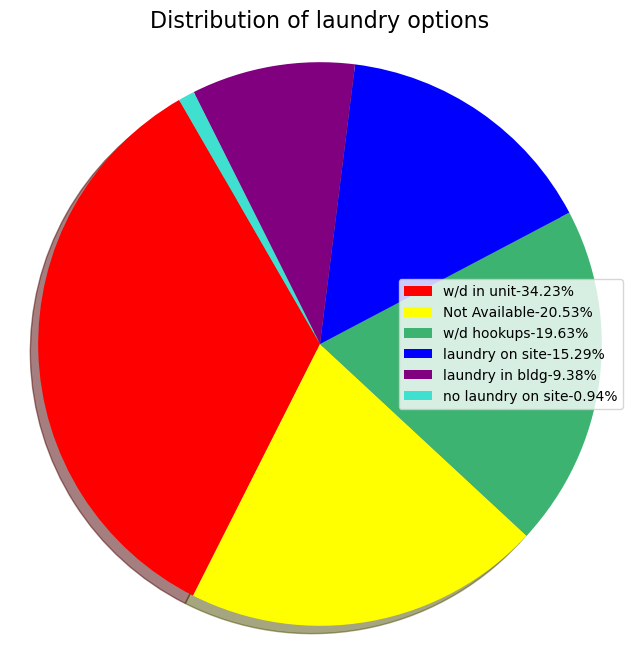

In [306]:
fig = plt.gcf()
plt.figure(figsize=(8,8))
baseColors = ["red", "yellow", "mediumseagreen", "blue", "purple","turquoise",]
laundry = dict(df2.laundry_options.value_counts())
labels = []
sizes = []
colors = []
count = 0
for i, v in laundry.items():
    labels.append(f"{i}-{round(((v / df2.shape[0]) * 100), 2)}%")
    sizes.append(v)
    colors.append(baseColors[count])
    count += 1

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=120)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title("Distribution of laundry options", fontsize = 16)
plt.show()

Laundry options are pretty evenly distributed, with the exception of no laundry on site 
representing 1% of listings.

In [34]:
df3=df2.copy()

In [35]:
#dropping 'state' column as it is not significant for the model:
df3.drop(['state'],axis=1,inplace=True)

In [36]:
df3.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,reno / tahoe,1148,apartment,1078,3.0,2.0,1,1,0,0,0,0,w/d in unit,carport,39.5483,-119.796
1,reno / tahoe,1200,condo,1001,2.0,2.0,0,0,0,0,0,0,w/d hookups,carport,39.5026,-119.789
2,reno / tahoe,1813,apartment,1642,2.0,2.0,1,1,1,0,0,0,w/d in unit,attached garage,39.6269,-119.708
3,reno / tahoe,1095,apartment,708,1.0,1.0,1,1,1,0,0,0,w/d in unit,carport,39.4477,-119.771
4,reno / tahoe,344,apartment,340,0.0,1.0,1,1,1,1,0,1,laundry on site,Not Available,39.5357,-119.805


 ● Data transformation

we are changing categorical feature to numerical feature with the help of label encoding.

In [37]:
#LABELENCODING
from sklearn.preprocessing  import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
df3['region']=le.fit_transform(df3['region'])
df3['type']=le.fit_transform(df3['type'])
df3['laundry_options']=le.fit_transform(df3['laundry_options'])
df3['parking_options']=le.fit_transform(df3['parking_options'])

In [40]:
df3.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,286,1148,0,1078,3.0,2.0,1,1,0,0,0,0,5,2,39.5483,-119.796
1,286,1200,2,1001,2.0,2.0,0,0,0,0,0,0,4,2,39.5026,-119.789
2,286,1813,0,1642,2.0,2.0,1,1,1,0,0,0,5,1,39.6269,-119.708
3,286,1095,0,708,1.0,1.0,1,1,1,0,0,0,5,2,39.4477,-119.771
4,286,344,0,340,0.0,1.0,1,1,1,1,0,1,2,0,39.5357,-119.805


In [41]:
#splitting dataset into input features and target variable:
x=df3.drop('price',axis=1)
y=df3['price']

In [42]:
x.head()

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long
0,286,0,1078,3.0,2.0,1,1,0,0,0,0,5,2,39.5483,-119.796
1,286,2,1001,2.0,2.0,0,0,0,0,0,0,4,2,39.5026,-119.789
2,286,0,1642,2.0,2.0,1,1,1,0,0,0,5,1,39.6269,-119.708
3,286,0,708,1.0,1.0,1,1,1,0,0,0,5,2,39.4477,-119.771
4,286,0,340,0.0,1.0,1,1,1,1,0,1,2,0,39.5357,-119.805


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc1=StandardScaler()

In [45]:
#scaling on input features:
x_scaled=sc1.fit_transform(x)

In [47]:
x_scaled

array([[ 0.83479589, -0.41764144,  0.3600758 , ..., -0.17309437,
         0.41841555, -1.64306718],
       [ 0.83479589,  0.27814508,  0.10333508, ..., -0.17309437,
         0.41015502, -1.6426427 ],
       [ 0.83479589, -0.41764144,  2.24061819, ..., -0.61301457,
         0.43262294, -1.63773085],
       ...,
       [ 0.83479589, -0.41764144, -0.43348641, ...,  1.14666621,
         0.4161561 , -1.64003518],
       [ 0.83479589, -0.41764144,  0.01997771, ..., -0.17309437,
         0.42025926, -1.63742765],
       [ 0.83479589, -0.41764144, -0.0433739 , ..., -0.17309437,
         0.40023153, -1.64155118]])

## Segregation of Target Variable and Features

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.2,random_state=470)

In [48]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(307981, 15)
xtest shape(76996, 15)
ytrain shape(307981,)
ytest shape(76996,)


In [49]:
xtrain

array([[ 1.02305753,  1.66971812,  2.24061819, ..., -0.61301457,
        -1.80157099,  0.61757933],
       [ 1.4166955 ,  1.66971812,  1.60043354, ..., -0.61301457,
        -1.21429592,  0.50755991],
       [-0.85100152,  1.66971812,  1.68712522, ...,  1.14666621,
         0.74090169,  1.24583552],
       ...,
       [-0.60283845, -0.41764144,  0.10000079, ...,  1.14666621,
         0.189362  ,  0.94444792],
       [ 0.86902528,  3.40918443,  2.24061819, ..., -0.61301457,
         1.22718858,  0.01140829],
       [-1.31309827, -0.41764144, -0.23342871, ...,  1.58658641,
         0.93065896,  1.31177562]])

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
dtreg=RandomForestRegressor(n_estimators=20)

In [52]:
dtreg.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=20)

In [53]:
ypred=dtreg.predict(xtest)

In [54]:
ypred

array([2245.        ,  982.39646603,  959.28693178, ..., 1294.77333333,
        735.        , 1097.15313078])

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [56]:
r2_score(ytest,ypred)

0.8928282383015678

In [57]:
mean_absolute_percentage_error(ytest,ypred)

0.0668081394872478

In [58]:
mean_squared_error(ytest,ypred)

22703.313011069364

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
mod=RandomizedSearchCV(dtreg,param_distributions=[{'max_depth':[15],'max_leaf_nodes':[10],'min_samples_leaf':[8],'min_samples_split':[8]}],cv=10)


In [61]:
mod.fit(xtrain,ytrain)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=20),
                   param_distributions=[{'max_depth': [15],
                                         'max_leaf_nodes': [10],
                                         'min_samples_leaf': [8],
                                         'min_samples_split': [8]}])

In [88]:
r2_score(ytest,ypred)

0.8935712313179555

In [89]:
mean_absolute_percentage_error(ytest,ypred)

0.06677176907182815

In [90]:
mean_squared_error(ytest,ypred)


22545.917044550184

###### Boosting

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
gbr=GradientBoostingRegressor( n_estimators=100)

In [64]:
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [65]:
ypred_gbr=gbr.predict(xtest)

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [67]:
r2_score(ytest,ypred_gbr)

0.6467052055450632

In [68]:
mean_squared_error(ytest,ypred_gbr)

74842.1242366232

In [69]:
mean_absolute_percentage_error(ytest,ypred_gbr)

0.20369974938280688

In [70]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [71]:
mod=RandomizedSearchCV(gbr,{'n_estimators':[i for i in range(10,60,10)],'learning_rate':[0.1,0.2,0.3],'max_depth':range(3,10)},cv=15)

In [ ]:
mod.fit(xtrain,ytrain)


In [81]:
mod.best_score_


0.8413550224435905

In [82]:
mod.best_params_

{'n_estimators': 40, 'max_depth': 9, 'learning_rate': 0.3}

In [83]:
ypred1=mod.predict(xtest)

In [84]:
r2_score(ytest,ypred1)

0.8420595388551715

After analysing the performance of the models i found the The best model which gave me good accuracy with less percentage of errors is random forest regressor.